# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Общая информация

In [1]:
#Импортируем данные, смотрим информацию, применяем sep для корректного отображения. Так же сохраним таблицу в исходном виде 
#с названием data_raw
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/Users/aleksandrfilippov/Downloads/real_estate_data.csv', sep = '\t')

In [3]:
data_raw = data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Рассмотрим данные из таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


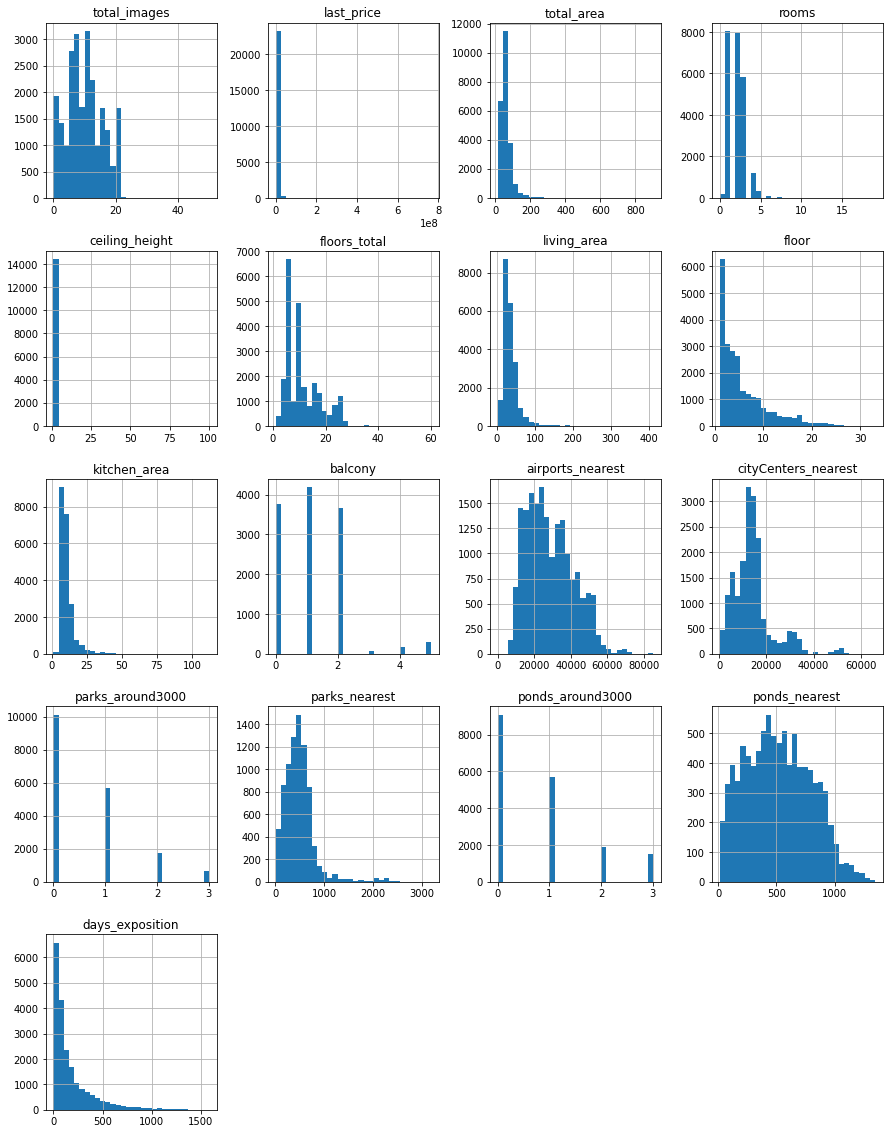

In [5]:
#Выведем все гистограммы для числовых столбцов
data.hist(figsize=(15, 20),bins = 30)
plt.show();

### Предобработка данных

#### Поиск и замена пропущенных значений

In [6]:
#Найдем пропущенные значения, выберем те, которые можно заменить и которые лучше не изменять
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
cityCenters_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


Рассмотрим каждый столбец, в котором есть пропущенные строки:

ceiling_height - высота потолков, предположительно человеческий фактор(не указаны данные). Так как данных достаточно много и они понадобятся для дальнейших рассчетов, будем считать, что в данных квартирах "типичная" для Санкт-Петербурга высота потолков, 2.5 метров.

floors_total - общее количество этажей, предположительно человеческий фактор или одноэтажные здания(так как пропущенных значений слишком мало). Надо сравнить с floor и подставить его значение в пропущенные столбцы. 

living_area - жилое помещение(кв.метр). Так как 0 метров площадь невозможна, возьмем медианные значения

is_apartment - коммерческое ли помещение? В данных есть 3 значения True, False, NaN, поэтому целесообразно привести все значения NaN к False и привести столбец к формату bool. Так как данных слишком много пропущенных, можно предположить что False как раз 

kitchen_area - кухонное помещение(кв.метр). Можно предположить что пропущенные значения либо относятся к studio, где кухня не является отдельной комнатой, либо к open_plan со схожим типом строения.

balcony - количество балконов. Скорее всего, если балконов NaN, значит их просто нет в квартире и целесообразно поставить 0.

locality_name - населенный пункт. Пропущенных значений всего 49, целесообразно сгруппировать их в "Другое".

airports_nearest - расстояние до ближайшего аэропорта в метрах(в данном случае учитывается только Пулково). Можно сгруппировать по locality_name и выбрать медианное значение.

cityCenters_nearest - расстояние до центра города (Санкт-Петербург). Можно сгруппировать по locality_name и выбрать медианное значение.

parks_around3000 - количество парков в радиусе 3км. Можно предположить, что в радиусе 3км нет парков и вместо 0 стоит NaN.

parks_nearest - расстояние до ближайшего парка. Судя по гистограмме учитываются варианты до 3км в радиусе, значит NaN можно заменить на 0.

ponds_around3000 - количество прудов в радиусе 3км. Можно предположить, что в радиусе 3км нет водоема и вместо 0 стоит NaN.

ponds_nearest - расстояние до ближайшего пруда. Судя по гистограмме учитываются варианты до 3км в радиусе, значит NaN можно заменить на 0.

days_exposition - количество дней, которое объявление "висит". Можно сравнить с максимальным днем в  first_day_exposition. Если пустые значения совпадают с максимальной датой, то можно заменить на 0, так как объявление вывесили в день создания датафрейма.

#### Замена явных дубликатов

In [7]:
# Найдем явные дубликаты
data.duplicated().sum() 

0

Явных дубликатов нет, значит нужно найти неявные дубликаты и заменить пропущенные значения

#### Замена пропущенных значений и удаление неявных дубликатов
##### last_price

In [8]:
#Изменим отображение данных
pd.options.display.float_format = '{:.2f}'.format
data['last_price'] = data['last_price'].apply(lambda x: float('{:.2f}'.format(x)))

##### ceiling_height

In [9]:
#Вставим в пропущенные значения средний показатель по Санкт-Петербургу, 2.5метров
data['ceiling_height'] = data['ceiling_height'].transform(lambda x: x.fillna(x.median()))

##### floors_total

In [10]:
#Узнаем на каких этажах находятся квартиры в пропущенных данных floors_total
data.loc[:, ['floor', 'floors_total']][data['floors_total'].isna()].sort_values('floor')

,floor,floors_total
237,1,NaN
15989,1,NaN
3817,1,NaN
20250,2,NaN
9979,2,NaN
...,...,...
8478,21,NaN
2392,22,NaN
14264,23,NaN
6030,24,NaN


Так как значения разные и понять сколько этажей в доме не имеет возможным на данном этапе, можно подставить значения из floor в floors_total, так как средние, медианные значения не будут подходить для максимальных чисел

In [11]:
#Вставим в пропущенные значения floors_total значения из floor и изменим тип данных, чтобы меньше нагружать систему
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'] = pd.to_numeric(data['floors_total'], downcast='integer')

##### locality_name 

In [12]:
# Кол-во дубликатов до
len(data.locality_name.unique())

365

In [13]:

#Проверим на неявные дубликаты и удалим их
#Заменим все значения NaN на 'Другое', чтобы было проще работать дальше.

data['locality_name'] = (data['locality_name']
                         .str.lower()
                         .str.replace(r'^.*\s(.*)$', r'\1', regex=True)
                         )

data['locality_name'] = data['locality_name'].fillna('другое')

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Аналогично про пропуски.
</div>


In [14]:
# Прверим кол-во дубликатов после
len(data.locality_name.unique())

295

##### is_apartment -> bool

In [15]:
#Переведем все отсутствующие значения в 'False' и изменим тип на bool, чтобы упростить дальнейшую работу
data['is_apartment'] = data['is_apartment'].fillna('False').astype(bool)

##### kitchen_area

In [16]:
#Проверим гипотезу, что в пропущенных ячейках kitchen_area тип здания open_plan или studio
print(data.loc[data['kitchen_area'].isna(), ['kitchen_area', 'studio']].groupby('studio').size())
data.loc[data['kitchen_area'].isna(), ['kitchen_area', 'open_plan']].groupby('open_plan').size()

studio
False    2129
True      149
dtype: int64


open_plan
False    2211
True       67
dtype: int64

Так как гипотеза не подтвердилась, логичным выводом будет подставить медианные значения из всей таблицы в пропущенные значения.

In [17]:
#Заменим все пустые ячейки на медианное значение и изменим тип данных, чтобы меньше нагружать систему
data['kitchen_area'] = (data
                           .groupby('locality_name')['kitchen_area']
                           .transform(lambda x: x.fillna(x.mean())))
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], downcast='float')

##### balcony

In [18]:
#Заменим все значения NaN на 0 и изменим тип данных, чтобы меньше нагружать систему
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = pd.to_numeric(data['balcony'], downcast='integer')

##### living_area 

In [19]:
#Заменим все пустые ячейки на медианное значение и изменим тип данных, чтобы меньше нагружать систему
data['living_area'] = (data
                           .groupby('locality_name')['living_area']
                           .transform(lambda x: x.fillna(x.mean())))
data['living_area'] = pd.to_numeric(data['living_area'], downcast='float')

##### parks_around3000 и parks_nearest

In [22]:
#Заменим значения на 0 и изменим тип данных
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)



##### ponds_around3000 и ponds_nearest


In [23]:
#Заменим значения на 0 и изменим тип данных
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)



##### days_exposition и first_day_exposition

In [24]:
#Для начала конвертируем first_day_exposition в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data[['first_day_exposition', 'days_exposition']].sort_values('first_day_exposition')

,first_day_exposition,days_exposition
10132,2014-11-27,573.00
8393,2014-11-27,972.00
15857,2014-11-27,NaN
2831,2014-11-27,1069.00
696,2014-11-27,574.00
...,...,...
10917,2019-05-03,NaN
5986,2019-05-03,NaN
9217,2019-05-03,NaN
21887,2019-05-03,NaN


Так как есть данные не только в последний день, а например за 2014 год, то можно подставить разницу между максимальным и текущим значением first_day_exposition в days_exposition

In [25]:
#Так же изменим тип с float на int, чтобы меньше нагружать систему
data['days_exposition'] = (data['days_exposition']
                           .fillna(
                               (data['first_day_exposition'].max() - data['first_day_exposition']).dt.days)
                           .astype(int))
data[['first_day_exposition', 'days_exposition']].sort_values('first_day_exposition')

,first_day_exposition,days_exposition
10132,2014-11-27,573
8393,2014-11-27,972
15857,2014-11-27,1618
2831,2014-11-27,1069
696,2014-11-27,574
...,...,...
10917,2019-05-03,0
5986,2019-05-03,0
9217,2019-05-03,0
21887,2019-05-03,0


#### Проверка предобработки, поиск и устранение аномальных значений
##### Результат предобработки
Повторно выведем информацию и проверим, все ли изменения сработали

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int8          
 7   living_area           23682 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23681 non-null  float32       
 13  balcony         

In [27]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,25.00,0,санкт-петербург,18863.00,16028.00,1,482.00,2,755.00,57
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,11.00,2,шушары,12817.00,18603.00,0,NaN,0,NaN,81
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,8.30,0,санкт-петербург,21741.00,13933.00,1,90.00,2,574.00,558
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,36.96,9,True,...,11.16,0,санкт-петербург,28098.00,6800.00,2,84.00,3,234.00,424
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,0,санкт-петербург,31856.00,8098.00,2,112.00,1,48.00,121
5,10,2890000.00,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0,янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.00,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,14.40,1,парголово,52996.00,19143.00,0,NaN,0,NaN,155
7,5,7915000.00,71.60,2019-04-18,2,2.65,24,36.96,22,True,...,18.90,2,санкт-петербург,23982.00,11634.00,0,NaN,0,NaN,15
8,20,2900000.00,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,6.50,2,санкт-петербург,50898.00,15008.00,0,NaN,0,NaN,289


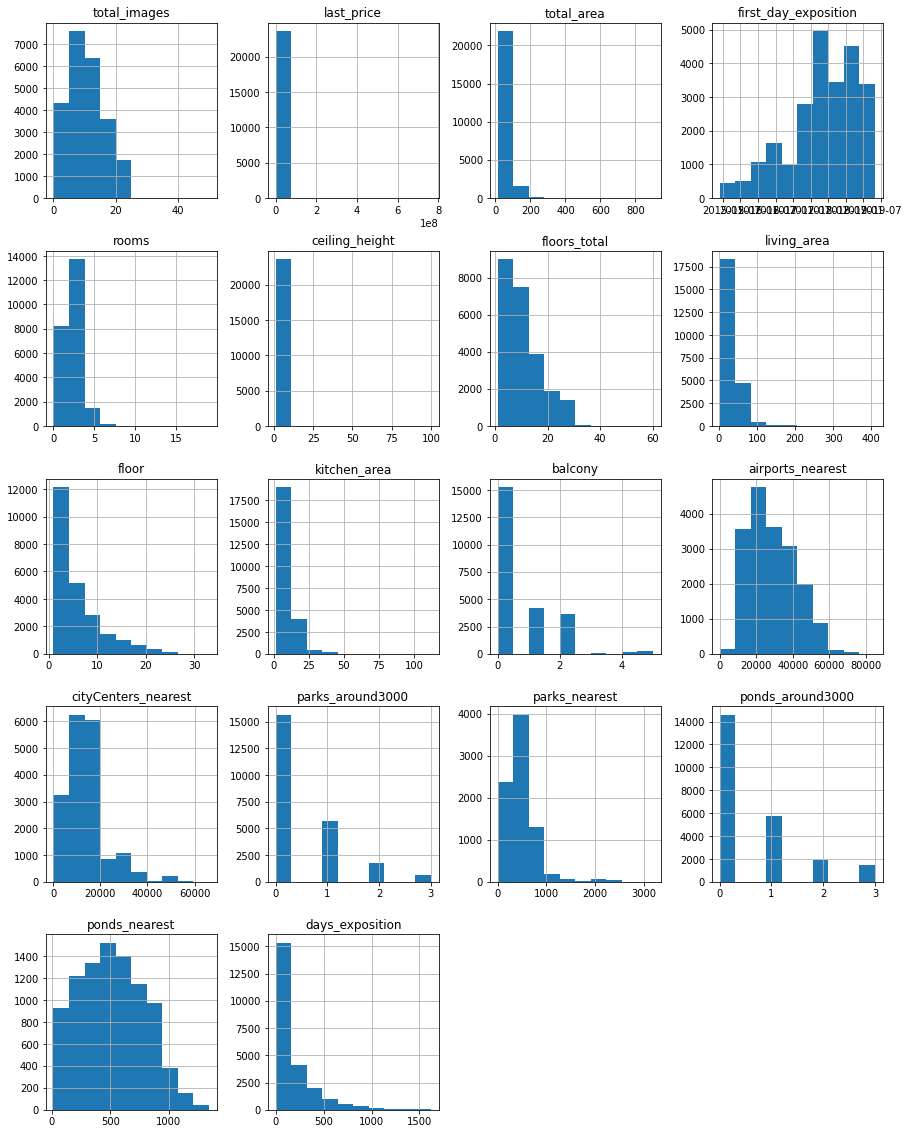

In [28]:
data.hist(figsize=(15, 20))
plt.show();

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                17
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               18
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

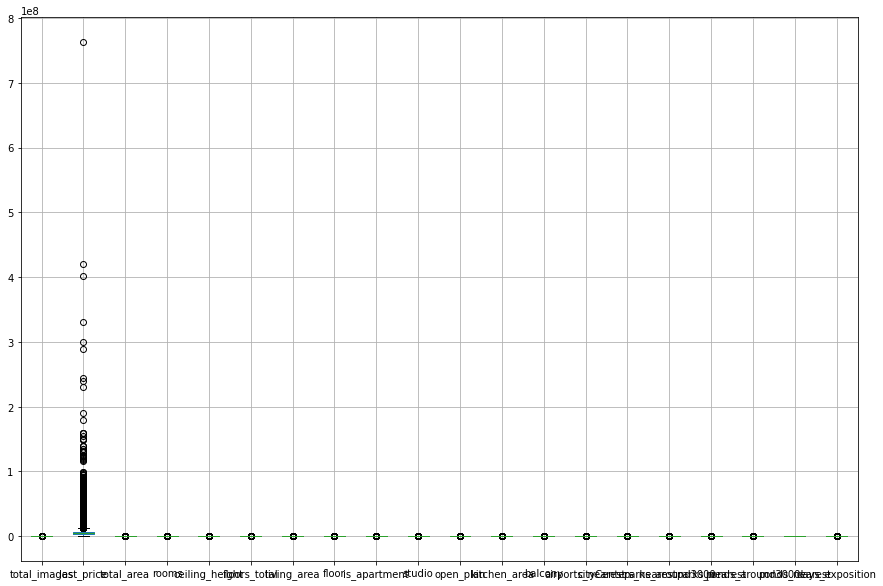

In [30]:
data.boxplot(figsize=(15, 10))
plt.show()

##### Поиск аномальных значений
Чтобы найти аномальные значения, посмотрим информацию о каждом столбце

In [31]:
#Функции, которая принимает значения датафрейма и столбца и возвращает столбец без выбросов
def remove_anomalies_both(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        low_bound = Q1 - 3 * IQR
        up_bound = Q3 + 3 * IQR

        data = data[(data[column] >= low_bound) & (data[column] <= up_bound)]

    return data

def remove_anomalies_original(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        low_bound = Q1 - 1.5 * IQR
        up_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= low_bound) & (data[column] <= up_bound)]

    return data

def remove_anomalies_up(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        up_bound = Q3 + 3 * IQR

        data = data[(data[column] <= up_bound)]

    return data

def remove_min_max(data, columns):
    for column in columns:
        data = data[(data[column] != data[column].max()) & (data[column] != data[column].min())]
        
    return data

In [32]:
#Выведем список всех столбцов на экран, чтобы понимать в каких столбцах применять функцию выше
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23682.00,23699.00,23681.00,23699.00,18157.00,18180.00,23699.00,8079.00,23699.00,9110.00,23699.00
mean,9.86,6541548.77,60.35,2.07,2.72,10.67,34.41,5.89,10.57,0.59,28793.67,14191.28,0.47,490.80,0.59,517.98,185.82
std,5.68,10887013.27,35.65,1.08,0.99,6.60,21.18,4.89,5.63,0.96,12630.88,8608.39,0.75,342.32,0.88,277.72,233.38
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,19.00,2.00,7.30,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,43.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.85,4.00,9.70,0.00,26726.00,13098.50,0.00,455.00,0.00,502.00,94.00
75%,14.00,6800000.00,69.90,3.00,2.70,16.00,41.10,8.00,11.53,1.00,37273.00,16293.00,1.00,612.00,1.00,729.00,237.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1618.00


Для каждого столбца приведем причины почему данные нужно оставить или отсечь аномальные значения                           
**total_images** - оставляем без изменений, в работе не несет смысловой нагрузки                                                     
**last_price** - Минимальные и максимальные значения являются очевидным выбросом (относительно первого и третьего квартилей), отсекаем     
**total_area** - Отсекаем по той же причине                                                                                 
**rooms** - основная доля комнат находится в пределах от 1 до 3, поэтому минимальные и максимальные значения является выбросами, отсекаем     
**ceiling_height** - отсекаем, очевидные выбросы                                                                               
**floors_total** - Так как мы предположили, что могут быть одноэтажные варианты, нижнюю границу мы не отсекаем, однако верх явно выброс 
**living_area** - Отсекаем, очевидно аномальные значения                                                                         
**floor** - хоть в Санкт-Петербурге есть здания с более чем 33 этажами(Лидер-Тауэр, например), в основе своей это редкость и скорее всего оставив данные, мы ухудшим статистику. Нижнюю границу оставляем                                                               
    **kitchen_area** - можно отсечь верхние выбросы, так как 75% находится в пределах 11.5 метров  и нижние, так как минимальное значение является выбросом                                      
**balcony** - оставляем                                                                                                     
**airports_nearest** - отсекаем по причине основной разброс от 20 до 35 км                                                       
**cityCenters_nearest** - можно отсечь верхнюю часть                                                                         
**parks_around3000** - оставляем                                                                                 
**parks_nearest** - оставляем                                                                                 
**ponds_around3000** - оставляем                                                                                 
**ponds_nearest** - оставляем                                                                                 
**days_exposition** - оставляем

In [33]:
data = remove_anomalies_both(data,['floor', 
                      'last_price',
                      'ceiling_height'])
data = remove_min_max(data,
                     ['floors_total', 
                      'last_price',
                      'total_area',
                      'living_area',
                      'kitchen_area',
                      'rooms',
                      'airports_nearest',
                      'cityCenters_nearest'])
data = data.reset_index(drop=True)

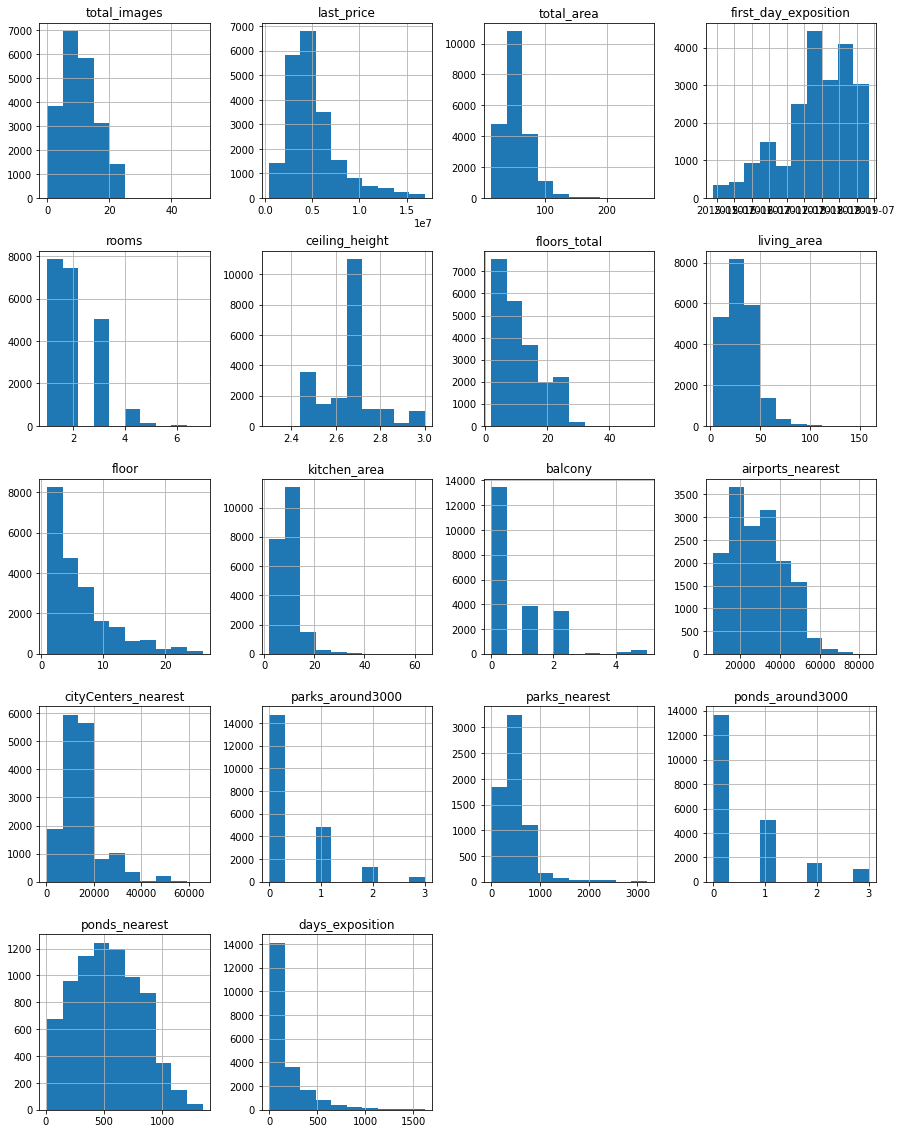

In [34]:
data.hist(figsize=(15, 20))
plt.show();

##### Вывод
В ходе этой части мы предобработали данные для дальнейшей части. Были выполнены следующие пункты:                                 
    -Устранены пропущенные значения                                                                                       
    -Обработаны выбросы                                                                                                
    -Преобразованы типы данных, как для функционального использования в дальнейшем, так и для снижения нагрузки вычислительной мощности

In [36]:
#Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21279 entries, 0 to 21278
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21279 non-null  int64         
 1   last_price            21279 non-null  float64       
 2   total_area            21279 non-null  float64       
 3   first_day_exposition  21279 non-null  datetime64[ns]
 4   rooms                 21279 non-null  int64         
 5   ceiling_height        21279 non-null  float64       
 6   floors_total          21279 non-null  int8          
 7   living_area           21265 non-null  float32       
 8   floor                 21279 non-null  int64         
 9   is_apartment          21279 non-null  bool          
 10  studio                21279 non-null  bool          
 11  open_plan             21279 non-null  bool          
 12  kitchen_area          21265 non-null  float32       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [37]:
data['price_per_sqm'] = data['last_price'] / data['total_area'] 

день публикации объявления 

In [38]:
data['weekday'] = data['first_day_exposition'].dt.dayofweek

месяц публикации объявления

In [39]:
data['month'] = data['first_day_exposition'].dt.month

год публикации объявления

In [40]:
data['year'] = data['first_day_exposition'].dt.year

тип этажа квартиры

In [41]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis = 1)

расстояние в км до центра города

In [42]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).replace(0.0, None)

In [43]:
#Удостоверимся что новые столбцы отображаются корректно
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.00,2,755.00,57,120370.37,3,3,2019,другой,16.03
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,18.60
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,90.00,2,574.00,558,92785.71,3,8,2015,другой,13.93
3,10,2890000.00,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,0,NaN,55,95065.79,0,9,2018,другой,13.93
4,6,3700000.00,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,NaN,0,NaN,155,99195.71,3,11,2017,другой,19.14
5,5,7915000.00,71.60,2019-04-18,2,2.65,24,36.96,22,True,...,NaN,0,NaN,15,110544.69,3,4,2019,другой,11.63
6,20,2900000.00,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,0,NaN,189,87454.76,2,5,2018,другой,11.63
7,18,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,0,NaN,289,88524.59,6,2,2017,другой,15.01
8,5,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,310.00,2,553.00,137,127525.25,3,11,2017,другой,13.88
9,9,3300000.00,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,NaN,0,NaN,7,75000.00,0,8,2018,другой,51.68


### Проведите исследовательский анализ данных

#### Анализ данных по параметрам и зависимость стоимости от этих параметров
В данном пункте посмотрим все параметры, сравним так же их влияние на стоимость. Для каждого параметра будем использовать функцию describe(), hist(), plot(kind='hexbin') где много разных значений или plot(kind='scatter') если разброс небольшой. Так же рассмотрим размер корреляции в таблице data_raw, чтобы удостовериться, что данные искажены в пределах допустимого               

Так же учтем такие значения силы связи между переменными:                                                                 
от 0 до 0,3	очень слабая                                                                                               
от 0,3 до 0,5	слабая                                                                                               
от 0, 5 до 0,7	средняя                                                                                                
от 0,7 до 0, 9	высокая                                                                                               
от 0,9 до 1	очень высокая                                                                                               
##### общая площадь

count   21279.00
mean       54.66
std        21.37
min        13.00
25%        39.30
50%        50.00
75%        64.80
max       263.80
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.6536750579657242
Наши данные 0.7444268885926488


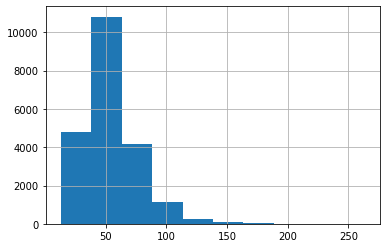

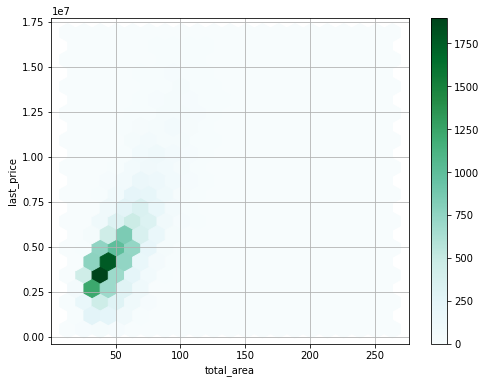

In [44]:
print(data['total_area'].describe())
print(data['total_area'].hist())
print(data
      .plot(x='total_area', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['total_area'].corr(data_raw['last_price']))
print('Наши данные',data['total_area'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 13 до 263.8 квадратных метров и средним значением 54.66.
Значение корреляции в 0.74 указывает на сильное влияние площади от стоимости жилья, в то время как сырые данные были в пределах 0.65, что говорит о незначительной силе удаленных значений.

##### Жилая площадь

count   21265.00
mean       31.34
std        13.96
min         3.00
25%        18.60
50%        30.00
75%        39.00
max       159.20
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.5449992843695984
Наши данные 0.5999893523837266


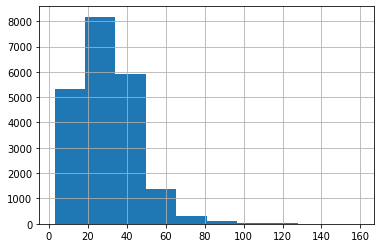

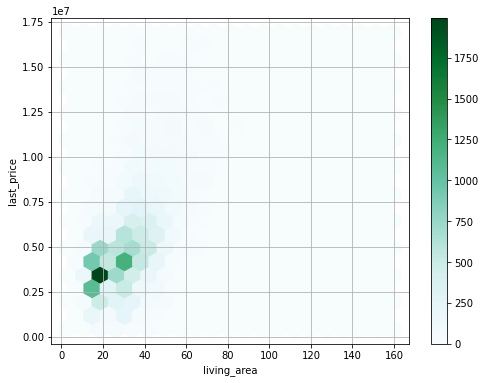

In [45]:
print(data['living_area'].describe())
print(data['living_area'].hist())
print(data
      .plot(x='living_area', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['living_area'].corr(data_raw['last_price']))
print('Наши данные',data['living_area'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 3 до 159.2 квадратных метров и средним значением 30.99. Значение корреляции в 0.6 указывает на среднее влияние площади жилого помещения на стоимость жилья, в то время как сырые данные были в пределах 0.55, что говорит о незначительной силе удаленных значений.

##### Площадь кухни

count   21265.00
mean        9.87
std         4.08
min         2.00
25%         7.00
50%         9.00
75%        11.16
max        64.00
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.44450886719423605
Наши данные 0.5355988698362547


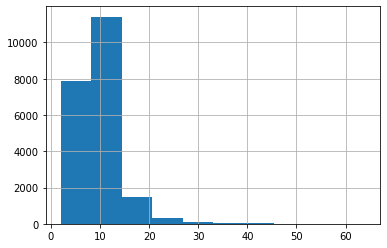

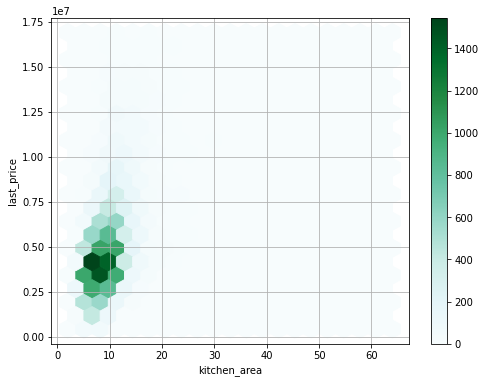

In [46]:
print(data['kitchen_area'].describe())
print(data['kitchen_area'].hist())
print(data
      .plot(x='kitchen_area', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['kitchen_area'].corr(data_raw['last_price']))
print('Наши данные',data['kitchen_area'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 2 до 64 квадратных метров и средним значением 9.87. Значение корреляции в 0.54 указывает на среднее влияние площади кухонного помещения на стоимость жилья, в то время как сырые данные были в пределах 0.44, что говорит о незначительной силе удаленных значений.

##### Количество комнат

count   21279.00
mean        1.97
std         0.92
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         7.00
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.3633428499648948
Наши данные 0.47077624965713066


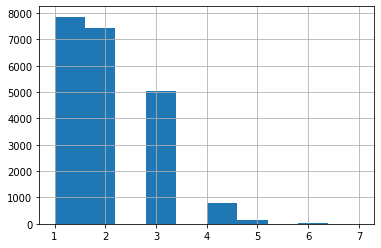

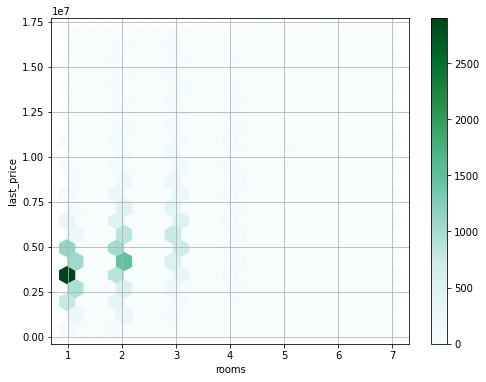

In [47]:
print(data['rooms'].describe())
print(data['rooms'].hist())
print(data
      .plot(x='rooms', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['rooms'].corr(data_raw['last_price']))
print('Наши данные',data['rooms'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 1 до 7 комнат и средним значением 1.97. Значение корреляции в 0.47 указывает на слабое влияние количества комнат на стоимости жилья, в то время как сырые данные были в пределах 0.36, что тоже является слабым влиянием, однако отклонение на 0.11 это уже высокий показатель.

##### Высота потолков

count   21279.00
mean        2.65
std         0.11
min         2.30
25%         2.60
50%         2.65
75%         2.65
max         3.00
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.06442462574188171
Наши данные 0.33867000481057974


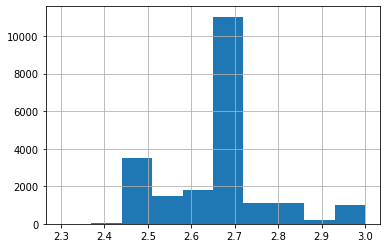

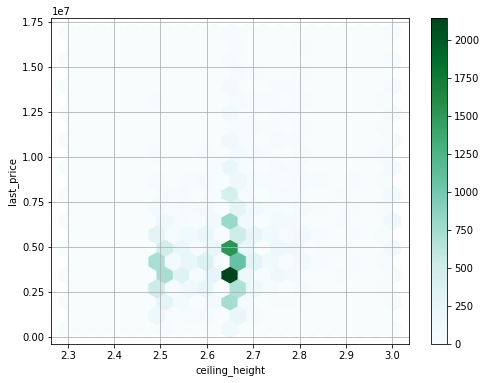

In [48]:
print(data['ceiling_height'].describe())
print(data['ceiling_height'].hist())
print(data
      .plot(x= 'ceiling_height', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['ceiling_height'].corr(data_raw['last_price']))
print('Наши данные',data['ceiling_height'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 2.3 до 3 метров и средним значением 2.65. Значение корреляции в 0.34 указывает на слабое влияние количества комнат на стоимости жилья, в то время как сырые данные были в пределах 0.07, что является очень слабым, поскольку в сырых данных около 45% данных было пропущено.

#####  Этаж квартиры

count   21279.00
mean        5.99
std         4.91
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        26.00
Name: floor, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные 0.026575643284470797
Наши данные 0.1438631921485007


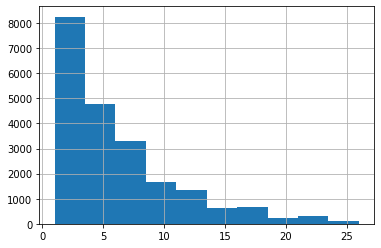

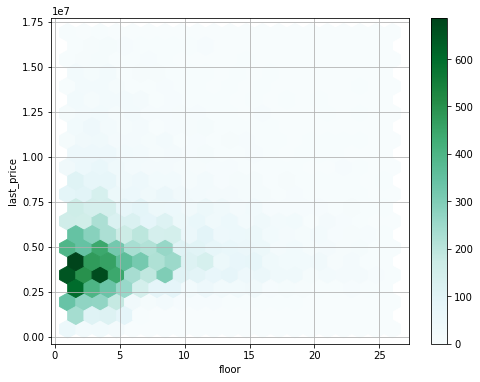

In [49]:
print(data['floor'].describe())
print(data['floor'].hist())
print(data
      .plot(x='floor', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['floor'].corr(data_raw['last_price']))
print('Наши данные',data['floor'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 1 до 26 этажей и средним значением 5.99. Значение корреляции в 0.14 указывает на слабое влияние количества комнат на стоимости жилья, в то время как сырые данные были в пределах 0.03, что тоже является слабым влиянием.

##### Тип этажа квартиры

AxesSubplot(0.125,0.125;0.775x0.755)


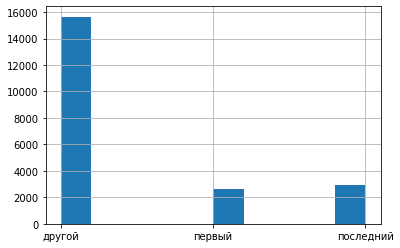

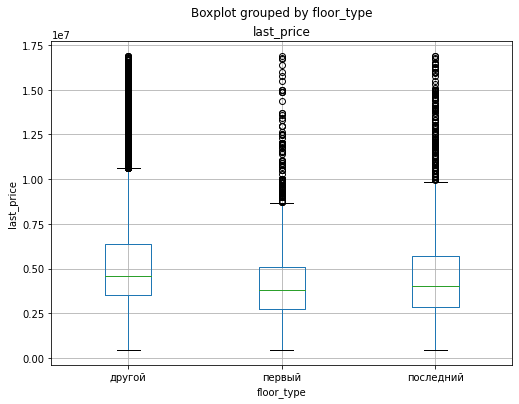

In [50]:
print(data['floor_type'].hist())
data.boxplot(column='last_price', by='floor_type', figsize=(8, 6))
plt.xlabel('floor_type')
plt.ylabel('last_price')
plt.show()

Вывод: Смотря на ящик с усами, можем сделать визуальный вывод о влиянии типа этажа на стоимость жилья:                            
-Первый и третий квартиль между последним и другими этажами не сильно меняются, однако сам ящик последнего этажа находится ниже, что говорит о более низкой стоимости таких квартир                                                                       
-Наименьший разброс по всем параметрам наблюдается у первого этажа, как и итоговая стоимость                                       
Относительно этого можно сделать вывод, что зависимость присутствует                                                        

##### Общее количество этажей в доме

count   21279.00
mean       10.95
std         6.61
min         2.00
25%         5.00
50%         9.00
75%        16.00
max        52.00
Name: floors_total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные -0.006993175632868308
Наши данные 0.20280093529974924


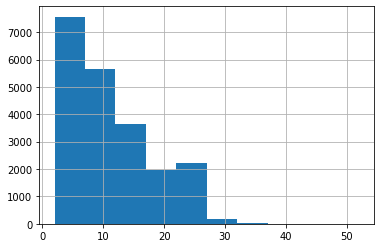

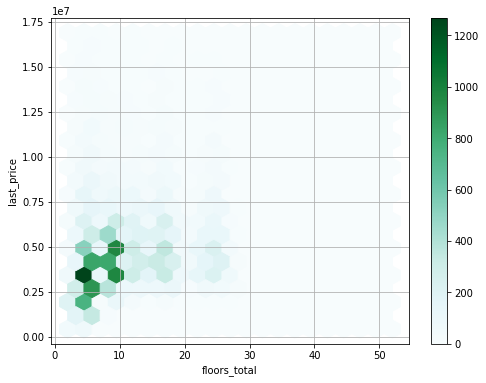

In [51]:
print(data['floors_total'].describe())
print(data['floors_total'].hist())
print(data
      .plot(x='floors_total', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['floors_total'].corr(data_raw['last_price']))
print('Наши данные',data['floors_total'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 1 до 52 этажей и средним значением 10.95. Значение корреляции в 0.2 указывает на слабое влияние количества этажей на стоимости жилья, в то время как сырые данные были в пределах -0.007, что показывает околонулевую отрицательную корреляцию

##### Расстояние до центра города в метрах

count   15953.00
mean    15089.32
std      8371.67
min       467.00
25%     10820.00
50%     13677.00
75%     16699.00
max     65764.00
Name: cityCenters_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные -0.20674734874298373
Наши данные -0.32153153096820136


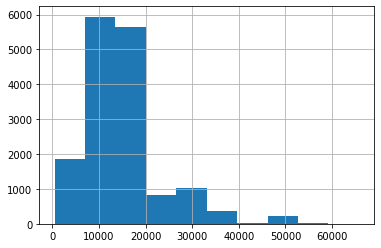

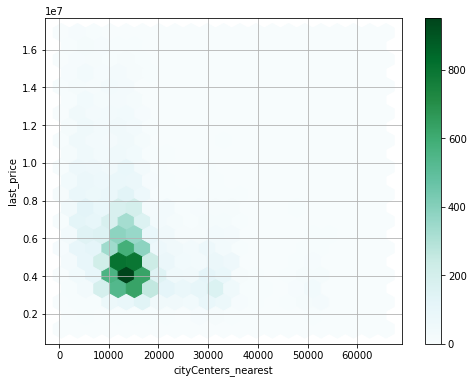

In [52]:
print(data['cityCenters_nearest'].describe())
print(data['cityCenters_nearest'].hist())
print(data
      .plot(x='cityCenters_nearest', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['cityCenters_nearest'].corr(data_raw['last_price']))
print('Наши данные',data['cityCenters_nearest'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 467 до 65764 метров и средним значением 15089.32. Стандартное отклонение равно примерно 4208.61, что указывает на разброс значений расстояния вокруг среднего значения. Значение корреляции в -0.32 указывает на слабое отрицательное влияние расстояния от центра на стоимости жилья (чем дальше от центра, тем дешевле жилье), в то время как сырые данные были в пределах -0.2, что тоже является слабым влиянием, однако отклонение на 0.19 это уже высокий показатель.

##### Расстояние до ближайшего аэропорта

count   15937.00
mean    29115.02
std     13029.85
min      6450.00
25%     17974.00
50%     27641.00
75%     38222.00
max     84665.00
Name: airports_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные -0.026238516833888743
Наши данные -0.01678387571095333


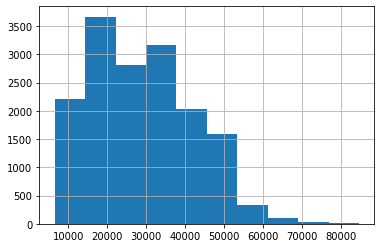

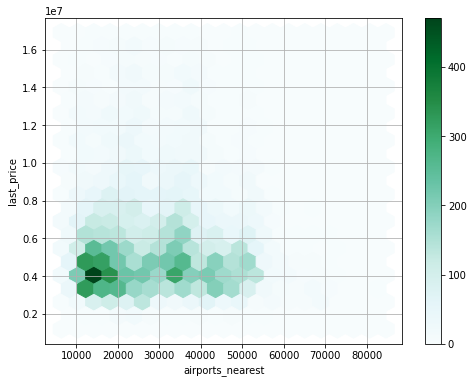

In [53]:
print(data['airports_nearest'].describe())
print(data['airports_nearest'].hist())
print(data
      .plot(x='airports_nearest', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['airports_nearest'].corr(data_raw['last_price']))
print('Наши данные',data['airports_nearest'].corr(data['last_price']))


Вывод: Размер выборки лежит в диапазоне от 6450 до 56095 метров и средним значением 29223.85. Значение корреляции в -0.06 указывает на отрицательное слабое влияние расстояния до аэропорта на стоимости жилья, в то время как сырые данные были в пределах -0.04, что тоже является слабым влиянием

##### Расстояние до ближайшего парка

count   6564.00
mean     499.87
std      343.95
min        1.00
25%      299.75
50%      461.50
75%      620.00
max     3190.00
Name: parks_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Сырые данные -0.016413927453985955
Наши данные 0.07238665741068125


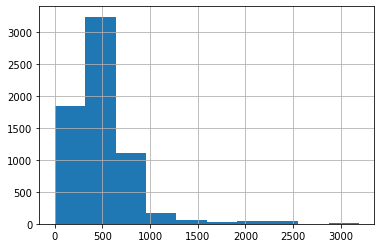

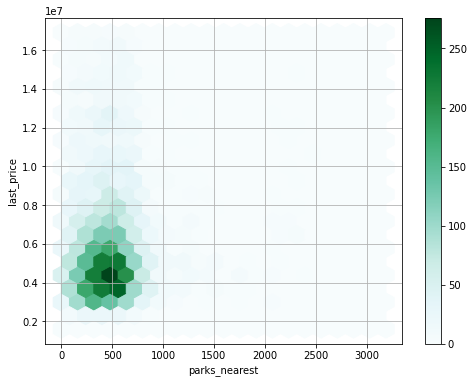

In [54]:
print(data['parks_nearest'].describe())
print(data['parks_nearest'].hist())
print(data
      .plot(x='parks_nearest', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Сырые данные' ,data_raw['parks_nearest'].corr(data_raw['last_price']))
print('Наши данные',data['parks_nearest'].corr(data['last_price']))

Вывод: Размер выборки лежит в диапазоне от 1 до 3190 метров и средним значением 499.87. Значение корреляции в 0.07 указывает на слабое влияние расстояния до парка на стоимости жилья, в то время как сырые данные были в пределах -0.02, что тоже является слабым отрицательным влиянием

##### Даты размещения (день недели, месяц, год)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Наши данные -0.011979769997223519


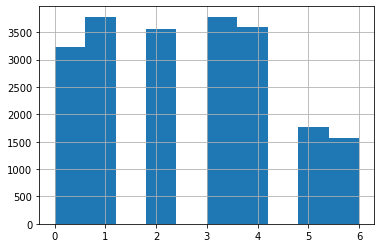

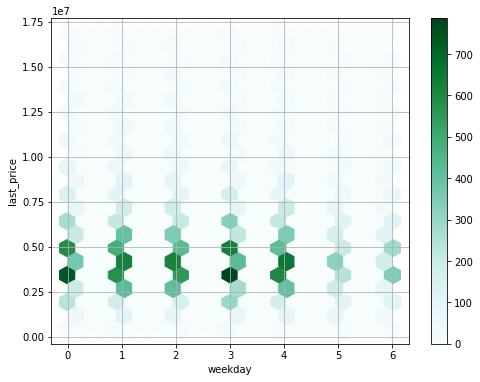

In [55]:
print(data['weekday'].hist())
print(data
      .plot(x='weekday', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Наши данные',data['weekday'].corr(data['last_price']))

Основные выводы которые можно сделать по графикам:                                                                    
    -Охотнее продаются квартиры в будние дни                                                                               
    -Есть определенный спрос на квартиры определенной ценовой категории (от 2.5 до 5 млн) в определенные дни, однако это не влияет на стоимость самих квартир                                                                                                 
    -Так как значение корреляции -0.01, то можно сделать вывод, что день недели никак не влияет на стоимость квартиры
    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Наши данные 0.007513483405378792


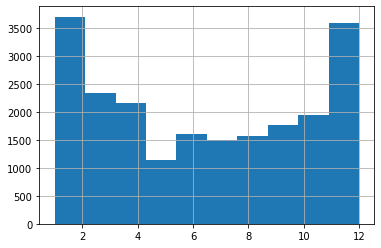

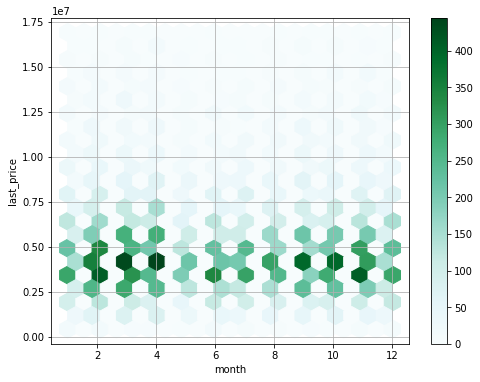

In [56]:
print(data['month'].hist())
print(data
      .plot(x='month', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Наши данные',data['month'].corr(data['last_price']))

Основные выводы которые можно сделать по графикам:                                                                    
    -Охотнее продаются квартиры в зимний период                                                                             
    -Есть определенный спрос на квартиры определенной ценовой категории (от 2.5 до 5 млн) в определенные месяцы, 
    однако это не влияет на стоимость самих квартир                                                                         
    -Так как значение корреляции 0.004, то можно сделать вывод, что месяц никак не влияет на стоимость квартиры

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
Наши данные -0.011208545616271805


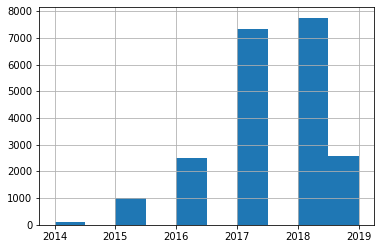

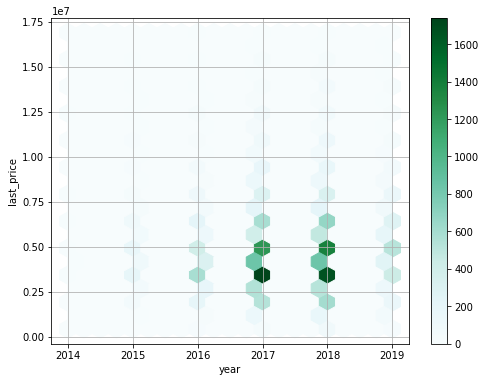

In [57]:
print(data['year'].hist())
print(data
      .plot(x='year', 
            y= 'last_price', 
            kind = 'hexbin', 
            gridsize=20, 
            figsize=(8,6), 
            sharex=False, 
            grid=True))
print('Наши данные',data['year'].corr(data['last_price']))

Основные выводы которые можно сделать по графикам:                                                                    
    -Предложение квартир на рынке с каждым годом все больше                                                                     -Так как значение корреляции 0.01, то можно сделать вывод, что год никак не влияет на стоимость квартиры

##### Скорость продажи квартир

count   21279.00
mean      176.17
std       221.27
min         0.00
25%        42.00
50%        90.00
75%       222.00
max      1618.00
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


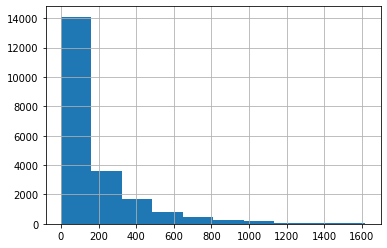

In [58]:
print(data['days_exposition'].describe())
print(data['days_exposition'].hist())


Вывод: длина продажи находится в диапазоне от 0 до 770 дней со средним значением 176.17 дней, и медианой в 90 дней. Основная доля продаж находится в промежутке от 42 до 222 дня(первый и третий квантиль, соответственно). Следовательно можно считать что быстрые продажи, это те, которые были совершены меньше чем за 42 дней, а медленные, которые "висели" больше 222 дня

#### Топ-10, средняя цена квадратного метра

In [59]:
# Найдем топ 10 населенных пунктов по числу объявлений
top_localities = data['locality_name'].value_counts().head(10).index

# Создадим переменную filtered_data, чтобы включить только значения из этих населенных пунктов
filtered_data = data[data['locality_name'].isin(top_localities)]

# Рассчитаем среднюю цену одного квадратного метра для каждого населенного пункта
sqm_mean_price = (filtered_data.groupby('locality_name')['last_price'].median() 
                  / 
                  filtered_data.groupby('locality_name')['total_area'].median())

# Добавим переменные для минимального и максимального значения топа:
highest_price = sqm_mean_price.idxmax()
lowest_price = sqm_mean_price.idxmin()


#Выведем данные:
print(f'Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений: {sqm_mean_price}')
print(f'Населённый пункт с самой высокой стоимостью квадратного метра: {highest_price}')
print(f'Населённый пункт с самой низкой стоимостью квадратного метра: {lowest_price}')




Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений: locality_name
всеволожск         64689.53
выборг             57613.17
гатчина            68444.44
колпино            72434.61
кудрово            97170.97
мурино             90734.91
парголово          96046.51
пушкин             96374.05
санкт-петербург   101562.50
шушары             78217.82
dtype: float64
Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Населённый пункт с самой низкой стоимостью квадратного метра: выборг


#### Средняя цена каждого километра

count      13586.00
mean      706996.18
std      1079885.91
min        82023.99
25%       299171.92
50%       408637.60
75%       671834.86
max     29764453.96
Name: price_per_km, dtype: float64


-0.5760220399846673

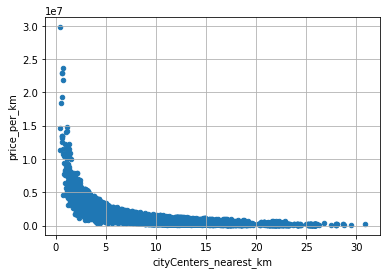

In [60]:
# Для начала отфильтруем таблицу по городу
spb_data = data[data['locality_name'] == 'санкт-петербург'].copy()

# Рассчитаем среднюю цену за километр
spb_data.loc[:, 'price_per_km'] = spb_data['last_price'] / spb_data['cityCenters_nearest_km']

# Выведем данные
print(spb_data['price_per_km'].describe())

spb_data.plot(x='cityCenters_nearest_km',
              y='price_per_km',
              kind='scatter',
              grid=True)
spb_data['price_per_km'].corr(spb_data['cityCenters_nearest_km'])



Вывод: Корреляция равна -0.57, что является средней отрицательной зависимостью, значит чем дальше от центра квартира, тем ниже ее стоимость. Это показывает и график, в котором видно как с увеличением расстояния, на всех этапах падает максимальная стоимость.

### Общий вывод

В ходе проекта была проведена следующая работа:                                                                        
-Предобработка данных                                                                                                
-Анализ параметров и выявление взаимосвязей                                                                                   
-Были определены факторы, влияющие на стоимость недвижимости                                                             
-Изучены временные характеристики продаж                                                                                   
-Проведен анализ рынка недвижимости в разных населенных пунктах.                                                 

Полученные результаты могут быть использованы для принятия решений о покупке или продаже недвижимости, а также для разработки маркетинговых стратегий в данной области.                                                                                    

Какие данные влияют на стоимость квартиры??                                                                        

Сильное влияние:                                                                                                        
-Общая площадь, 0.74                                                                                                


Среднее влияние:                                                                                                         
-Жилая площадь 0.59                                                                                                
-Расстояния от центра -0.57                                                                                    
-Площадь кухни 0.54                                                                                                


Слабое влияние:                                                                                                
-Количество комнат 0.47                                                                                                
-Высота потолков 0.34                                                                                                
-Расстояние до центра города -0.32                                                                                    


Незначительное влияние:                                                                                                
-Этаж квартиры 0.14                                                                                                     
-Общее количество этажей 0.20                                                                                    
-Расстояние до аэропорта -0.02                                                                                     
-Расстояние до ближайшего парка 0.07                                                                                    
-День, месяц, год продажи квартиры (околонулевые значения)                                                             


Так же можно ожидать, что после выставления квартиры, она будет продана в период от 42 до 222 дней                                 
Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург                                                
Населённый пункт с самой низкой стоимостью квадратного метра: выборг                                                

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод